In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import regularizers

# 生成1000筆10Hz的正弦波
np.random.seed(42)
num_samples = 1000
time = np.linspace(0, 1, num_samples)
frequency = 10
amplitude = 1.0
sin_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# 添加高斯噪聲
noise = np.random.normal(loc=0, scale=0.1, size=num_samples)
noisy_sin_wave = sin_wave + noise

# 定義FIR濾波器的係數個數
num_coefficients = 29

# 建立訓練資料
X_train = []
y_train = []

for i in range(num_samples - num_coefficients):
    X_train.append(noisy_sin_wave[i:i+num_coefficients])
    y_train.append([sin_wave[i]])

X_train = np.array(X_train)
y_train = np.array(y_train)

# 建立模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(num_coefficients,), activation=None)
])

# 建立模型 L1-norm learning rate = 0.01
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, input_shape=(num_coefficients,), activation=None, kernel_regularizer=regularizers.l1(0.01))
# ])


# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X_train, y_train, epochs=500, batch_size=32)

# 獲得訓練後的係數
trained_coefficients = model.get_weights()[0].flatten()

# # 選擇重要特徵
# threshold = 0.001  # 設定閾值，根據需求調整
# important_features = np.where(np.abs(trained_coefficients) > threshold)[0]

print("訓練後的係數：", trained_coefficients)


Epoch 1/500
31/31 [==============================] - 5s 4ms/step - loss: 1.7005
Epoch 2/500
31/31 [==============================] - 0s 4ms/step - loss: 0.9311
Epoch 3/500
31/31 [==============================] - 0s 6ms/step - loss: 0.5367
Epoch 4/500
31/31 [==============================] - 0s 9ms/step - loss: 0.3099
Epoch 5/500
31/31 [==============================] - 0s 7ms/step - loss: 0.1733
Epoch 6/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0953
Epoch 7/500
31/31 [==============================] - 0s 7ms/step - loss: 0.0538
Epoch 8/500
31/31 [==============================] - 0s 4ms/step - loss: 0.0329
Epoch 9/500
31/31 [==============================] - 0s 5ms/step - loss: 0.0233
Epoch 10/500
31/31 [==============================] - 0s 7ms/step - loss: 0.0193
Epoch 11/500
31/31 [==============================] - 0s 5ms/step - loss: 0.0176
Epoch 12/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0169
Epoch 13/500
31/31 [=================

In [2]:
# # 獲得訓練後的係數
# trained_coefficients = model.get_weights()[1].flatten()

# print("訓練後的係數：", trained_coefficients)

# 使用索引選擇操作來取得對應的係數
# trained_coefficients = trained_coefficients[important_features]
# print("trained_coefficients = ", trained_coefficients)

In [3]:
total_sum = sum(trained_coefficients)
print("sum = ", total_sum)
print("trained_coefficients = ", trained_coefficients)
trained_coefficients_normalized = trained_coefficients / np.sum(trained_coefficients)
total_sum_normalized = sum(trained_coefficients_normalized)
print("sum = ", total_sum_normalized) # 可能丟到MCU上面跑的話需要正規化成1才能保證不會offset
print("trained_coefficients_normalized = ", trained_coefficients_normalized)

sum =  0.733768955222331
trained_coefficients =  [ 0.10784028  0.1063766   0.10001834  0.09200766  0.09663354  0.08816693
  0.07837668  0.06755291  0.06853577  0.06427784  0.05731882  0.04494993
  0.0395999   0.03340565  0.02714196  0.02048047  0.0164767   0.01404972
  0.000161   -0.00892401 -0.01229917 -0.01418605 -0.02587755 -0.04007138
 -0.0493615  -0.04777425 -0.05662858 -0.06384104 -0.07063822]
sum =  1.000000002226443
trained_coefficients_normalized =  [ 0.14696763  0.14497288  0.13630769  0.1253905   0.13169478  0.12015626
  0.10681384  0.09206292  0.09340239  0.08759956  0.07811562  0.06125896
  0.0539678   0.04552612  0.0369898   0.02791133  0.02245489  0.01914734
  0.00021941 -0.01216188 -0.01676164 -0.01933313 -0.03526662 -0.05461035
 -0.06727118 -0.06510802 -0.07717495 -0.08700428 -0.09626767]


### NOISE GATE

In [4]:
# Generate 1000 samples of a 10Hz sine wave with noise
num_samples = 1000
time_steps = np.linspace(0, 1, num_samples)
frequency = 10  # 10Hz
amplitude = 150.0
sin_wave = amplitude * np.sin(2 * np.pi * frequency * time_steps)

# Generate random noise with mean 0 and standard deviation 0.1
noise = 10 * np.random.randn(num_samples)

# Add the noise to the sine wave
sin_wave_with_noise = sin_wave + noise

sum =  1.0000000000999998
sum =  1.000000002226443


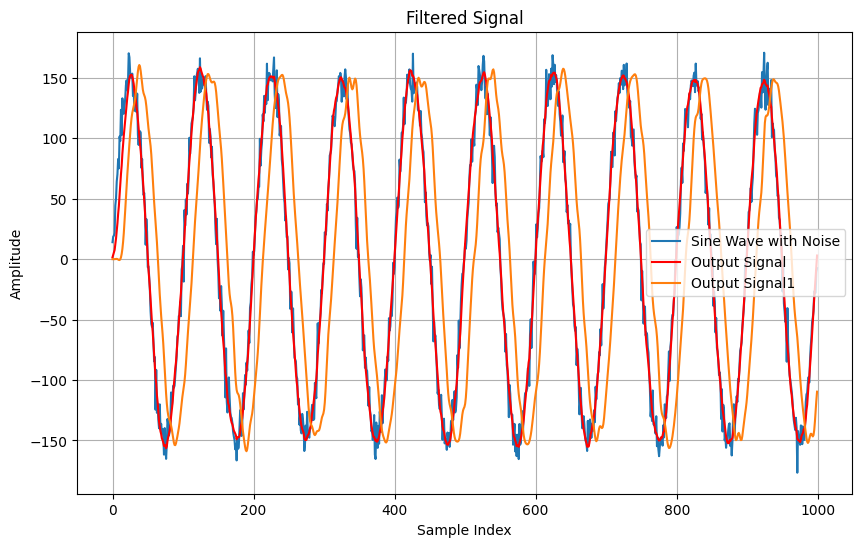

In [7]:
import matplotlib.pyplot as plt
from scipy.signal import lfilter
import numpy as np

trained_coefficients1 = [  -0.0018225230, -0.0015879294, +0.0000000000, +0.0036977508, +0.0080754303, +0.0085302217, -0.0000000000, -0.0173976984,
  -0.0341458607, -0.0333591565, +0.0000000000, +0.0676308395, +0.1522061835, +0.2229246956, +0.2504960933, +0.2229246956,
  +0.1522061835, +0.0676308395, +0.0000000000, -0.0333591565, -0.0341458607, -0.0173976984, -0.0000000000, +0.0085302217,
  +0.0080754303, +0.0036977508, +0.0000000000, -0.0015879294, -0.0018225230]
total_trained_coefficients1 = sum(trained_coefficients1)
print("sum = ", total_trained_coefficients1)
total_trained_coefficients_normalized = sum(trained_coefficients_normalized)
print("sum = ", total_trained_coefficients_normalized)

# 濾波處理
output_signal = lfilter(trained_coefficients, 1.0, sin_wave_with_noise)
output_signal1 = lfilter(trained_coefficients1, 1.0, sin_wave_with_noise)

# 繪製輸出信號
plt.figure(figsize=(10, 6))
plt.plot(sin_wave_with_noise, label='Sine Wave with Noise')
plt.plot(output_signal, label='Output Signal', color='red')
plt.plot(output_signal1, label='Output Signal1')
# plt.plot(sin_wave, label='Sine Wave')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Filtered Signal')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import numpy as np
import csv

np.random.seed(42)
num_samples = 1000
time = np.linspace(0, 1, num_samples)
frequency = 10
amplitude = 1.0
sin_wave = amplitude * np.sin(2 * np.pi * frequency * time)

noise = np.random.normal(loc=0, scale=0.1, size=num_samples)
noisy_sin_wave = sin_wave + noise

# 设置CSV文件名
sin_wave_csv_filename = "sin_wave_data.csv"
noisy_sin_wave_csv_filename = "noisy_sin_wave_data.csv"

# 将sin_wave写入CSV文件
with open(sin_wave_csv_filename, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Time", "SinWave"])  # 写入列标题
    for t, sin_val in zip(time, sin_wave):
        csv_writer.writerow([t, sin_val])  # 写入数据行

print("CSV文件已创建:", sin_wave_csv_filename)

# 将noisy_sin_wave写入CSV文件
with open(noisy_sin_wave_csv_filename, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Time", "NoisySinWave"])  # 写入列标题
    for t, noisy_sin_val in zip(time, noisy_sin_wave):
        csv_writer.writerow([t, noisy_sin_val])  # 写入数据行

print("CSV文件已创建:", noisy_sin_wave_csv_filename)


CSV文件已创建: sin_wave_data.csv
CSV文件已创建: noisy_sin_wave_data.csv
